<a href="https://colab.research.google.com/github/loydvinup/NetFlix_recommendations-CAPSTONE-ML/blob/main/NetflixCapStone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])


dataset['Rating'] = dataset['Rating'].astype(float)

In [3]:
dataset.head(100)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
95,1245406,4.0
96,1834590,3.0
97,593225,3.0
98,1011918,4.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
dataset.shape



(24058263, 2)

In [6]:
dataset = dataset.sample(frac=0.5, random_state=42)

In [7]:
RatesCount=dataset.groupby("Rating")["Rating"].agg(['count'])


In [8]:
 df=dataset
 df

,Cust_Id,Rating
22281427,1753212,4.0
12009376,559180,3.0
17766168,2552319,1.0
20134498,2148252,3.0
15393678,1799643,5.0
...,...,...
12966176,1659847,3.0
12664628,2130988,4.0
3461602,2409879,2.0
4677212,1899288,4.0


In [9]:
# Find Movie Count

MovieCount=df.isnull().sum()[1]

<ipython-input-9-81583e1823e6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  MovieCount=df.isnull().sum()[1]


In [10]:
MovieCount

4

In [11]:
# Get Customer Count

In [12]:
Customer_count=df.Cust_Id.nunique()-MovieCount


In [13]:
Customer_count

22313

In [14]:
# get rating count

In [15]:
RatingCount=df.Cust_Id.count()-MovieCount

In [16]:
RatingCount

24054

In [17]:
df

,Cust_Id,Rating
22281427,1753212,4.0
12009376,559180,3.0
17766168,2552319,1.0
20134498,2148252,3.0
15393678,1799643,5.0
...,...,...
12966176,1659847,3.0
12664628,2130988,4.0
3461602,2409879,2.0
4677212,1899288,4.0


<ipython-input-18-3435faace441>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(RatesCount.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, RatesCount.iloc[i-1][0]*100 / RatesCount.sum()[0]), color = 'white', weight = 'bold')


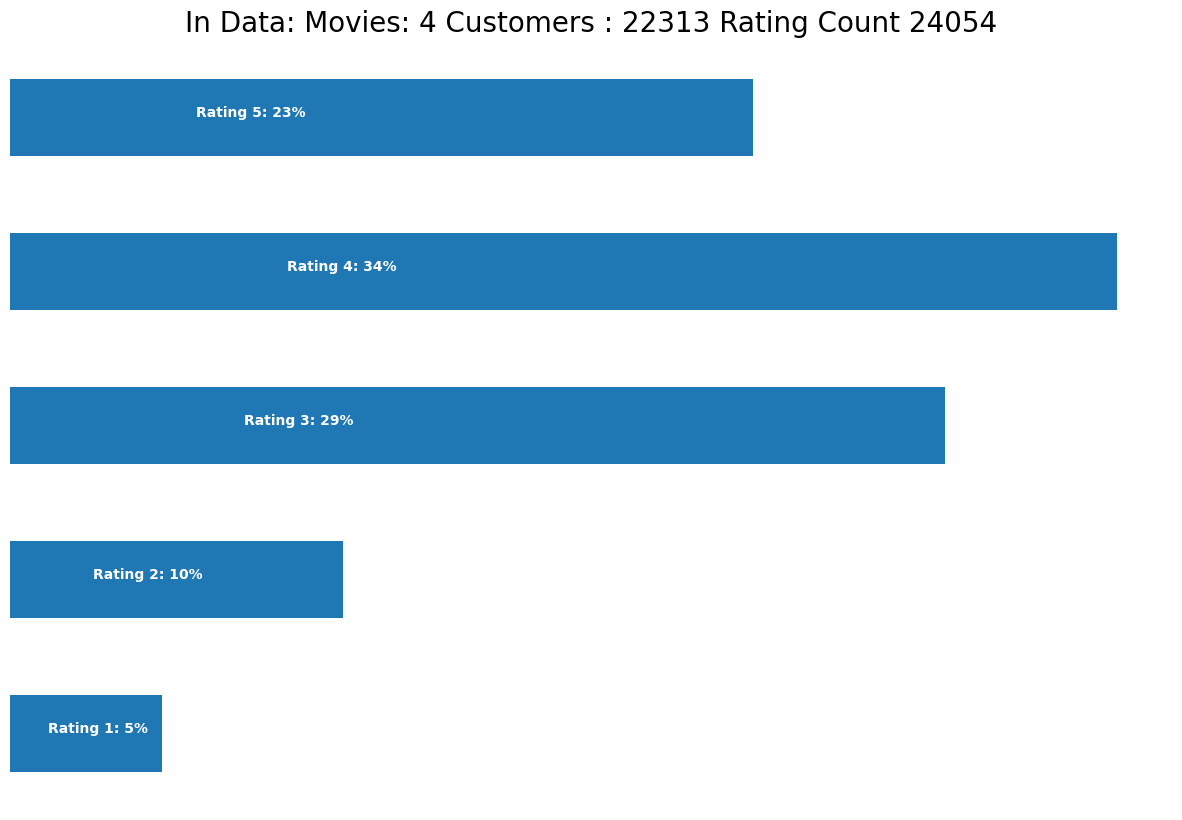

In [18]:
ax = RatesCount.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'In Data: Movies: {MovieCount} Customers : {Customer_count} Rating Count {RatingCount}', fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(RatesCount.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, RatesCount.iloc[i-1][0]*100 / RatesCount.sum()[0]), color = 'white', weight = 'bold')

In [19]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset

df_nan=pd.DataFrame(pd.isnull(df['Rating']))

In [20]:
df_nan

,Rating
22281427,False
12009376,False
17766168,False
20134498,False
15393678,False
...,...
12966176,False
12664628,False
3461602,False
4677212,False


In [21]:

# TO save index of the Nan row
df_nan=df_nan[df_nan['Rating']==True]



In [22]:
df_nan

,Rating
17755377,True
13787159,True
9981497,True
11519824,True


In [23]:
# Reset index
df_nan=df_nan.reset_index()

In [24]:
df_nan.head(10)

,index,Rating
0,17755377,True
1,13787159,True
2,9981497,True
3,11519824,True


In [25]:
#To create a numpy array containing movie ids according the 'ratings' dataset



In [26]:
movie_np = []
movie_id = 1

for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    size = i - j - 1
    if size > 0:  # Only process valid sizes
        movie_np.append(np.full(size, movie_id))
        movie_id += 1

# Handling last record safely
last_size = len(df) - df_nan.iloc[-1, 0] - 1
if last_size > 0:
    movie_np.append(np.full(last_size, movie_id))

# Convert list to NumPy array
movie_np = np.concatenate(movie_np) if movie_np else np.array([])

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1 1 1 ... 1 1 1]
Length: 1538326


In [49]:
# Remove missing ratings
df = df[pd.notnull(df['Rating'])]

# Ensure Movie_Id and Cust_Id are integers
if 'Movie_Id' in df.columns and len(movie_np) == len(df):
    df['Movie_Id'] = movie_np.astype(int)
else:
    df['Movie_Id'] = df.index  # Assign Movie_Id if movie_np is missing or mismatched

df = df.dropna(subset=['Cust_Id'])  # Ensure Cust_Id has no NaNs
df['Cust_Id'] = df['Cust_Id'].astype(int)

df.head()

,Cust_Id,Rating,Movie_Id
22281427,1753212,4.0,22281427
12009376,559180,3.0,12009376
17766168,2552319,1.0,17766168
20134498,2148252,3.0,20134498
15393678,1799643,5.0,15393678


In [31]:
df.head()

,Cust_Id,Rating,Movie_Id
22281427,1753212,4.0,22281427
12009376,559180,3.0,12009376
17766168,2552319,1.0,17766168
20134498,2148252,3.0,20134498
15393678,1799643,5.0,15393678


In [32]:
f = ['count','mean']

In [33]:
# To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1.0


In [34]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 1.0


In [35]:
print(f'Original Shape: {df.shape}')

Original Shape: (24054, 3)


In [36]:
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))

After Trim Shape: (24054, 3)


In [37]:
df_title = pd.read_csv('/content/drive/MyDrive/movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name','blank','blank2','blank3'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name blank blank2 blank3
Movie_Id                                                          
1         2003.0               Dinosaur Planet   NaN    NaN    NaN
2         2004.0    Isle of Man TT 2004 Review   NaN    NaN    NaN
3         1997.0                     Character   NaN    NaN    NaN
4         1994.0  Paula Abdul's Get Up & Dance   NaN    NaN    NaN
5         2004.0      The Rise and Fall of ECW   NaN    NaN    NaN
6         1997.0                          Sick   NaN    NaN    NaN
7         1992.0                         8 Man   NaN    NaN    NaN
8         2004.0    What the #$*! Do We Know!?   NaN    NaN    NaN
9         1991.0      Class of Nuke 'Em High 2   NaN    NaN    NaN
10        2001.0                       Fighter   NaN    NaN    NaN


In [38]:
df_title.reset_index(inplace=True)

df_title = df_title[['Movie_Id','Year', 'Name']]


In [39]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [40]:
 %pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505183 sha256=0404c9bdeebd040a3eba5b06e21175e4c52673f1ee260582205ed6ec93694729
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [41]:


import math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [42]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0758  1.0821  1.0915  1.0831  0.0064  
MAE (testset)     0.9041  0.9075  0.9110  0.9076  0.0028  
Fit time          0.56    0.54    0.40    0.50    0.07    
Test time         0.04    0.04    0.04    0.04    0.00    


{'test_rmse': array([1.07580617, 1.08209711, 1.09145426]),
 'test_mae': array([0.90410516, 0.90750241, 0.91104787]),
 'fit_time': (0.5622704029083252, 0.5431904792785645, 0.39786767959594727),
 'test_time': (0.03885245323181152, 0.03765749931335449, 0.03850960731506348)}

In [43]:
dataset_712664 = df[(df['Cust_Id'] == 712664) & (df['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

,Name
Movie_Id,


In [44]:

user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()


user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]



data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)


trainset = data.build_full_trainset()
svd.fit(trainset)

user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


user_712664 = user_712664.drop('Movie_Id', axis = 1)

user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

print(user_712664.head(10))

       index    Year                           Name  Estimate_Score
14862  14862  1986.0  Entrails of a Beautiful Woman        3.713264
10179  10179  1990.0                    Blobermouth        3.626272
16044  16044  1989.0            A Raisin in the Sun        3.623615
526      526  1985.0                Barbarian Queen        3.610082
11847  11847  1997.0           For Richer or Poorer        3.598237
11846  11846  2005.0                  Dust to Glory        3.598237
11845  11845  1985.0                 Prizzi's Honor        3.598237
11844  11844  1955.0                     Summertime        3.598237
11843  11843  1967.0           Barefoot in the Park        3.598237
11842  11842  1993.0            NYPD Blue: Season 1        3.598237


In [45]:
dataset_712664

,Name
Movie_Id,


In [46]:
dataset_712664 = df[(df['Cust_Id'] == 712664) & (df['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()


user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]



data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)


trainset = data.build_full_trainset()
svd.fit(trainset)

user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


user_712664 = user_712664.drop('Movie_Id', axis = 1)

user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

print(user_712664.head(10))

       index    Year                           Name  Estimate_Score
14862  14862  1986.0  Entrails of a Beautiful Woman        3.698131
16044  16044  1989.0            A Raisin in the Sun        3.630367
10179  10179  1990.0                    Blobermouth        3.626698
526      526  1985.0                Barbarian Queen        3.624552
11847  11847  1997.0           For Richer or Poorer        3.598237
11846  11846  2005.0                  Dust to Glory        3.598237
11845  11845  1985.0                 Prizzi's Honor        3.598237
11844  11844  1955.0                     Summertime        3.598237
11843  11843  1967.0           Barefoot in the Park        3.598237
11842  11842  1993.0            NYPD Blue: Season 1        3.598237


In [47]:
def recommend_movies_for_user(user_id, df, df_title, svd, drop_movie_list):

    dataset_user = df[(df['Cust_Id'] == user_id) & (df['Rating'] == 5)]
    dataset_user = dataset_user.set_index('Movie_Id')
    dataset_user = dataset_user.join(df_title)['Name']

    user_data = df_title.copy()
    user_data = user_data.reset_index()
    user_data = user_data[~user_data['Movie_Id'].isin(drop_movie_list)]

    data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)
    trainset = data.build_full_trainset()
    svd.fit(trainset)

    user_data['Estimate_Score'] = user_data['Movie_Id'].apply(lambda x: svd.predict(user_id, x).est)
    user_data = user_data.drop('Movie_Id', axis=1)
    user_data = user_data.sort_values('Estimate_Score', ascending=False)

    return user_data.head(10)
user_id = int(input("Enter user ID: "))


recommended_movies = recommend_movies_for_user(user_id, df, df_title, svd, drop_movie_list)
print(recommended_movies)

Enter user ID: 1
       index    Year                           Name  Estimate_Score
14862  14862  1986.0  Entrails of a Beautiful Woman        3.710283
10179  10179  1990.0                    Blobermouth        3.634305
526      526  1985.0                Barbarian Queen        3.623542
16044  16044  1989.0            A Raisin in the Sun        3.618820
11847  11847  1997.0           For Richer or Poorer        3.598237
11846  11846  2005.0                  Dust to Glory        3.598237
11845  11845  1985.0                 Prizzi's Honor        3.598237
11844  11844  1955.0                     Summertime        3.598237
11843  11843  1967.0           Barefoot in the Park        3.598237
11842  11842  1993.0            NYPD Blue: Season 1        3.598237


In [48]:
dataset.head()

,Cust_Id,Rating
22281427,1753212,4.0
12009376,559180,3.0
17766168,2552319,1.0
20134498,2148252,3.0
15393678,1799643,5.0
